# The Sound of Quantum

## Load required packages

In [34]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd
from pprint import pprint

In [35]:
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute, BasicAer
from qiskit.tools.visualization import plot_histogram, circuit_drawer
from IPython.display import display

## Create a Quantum circuit with a single qubit

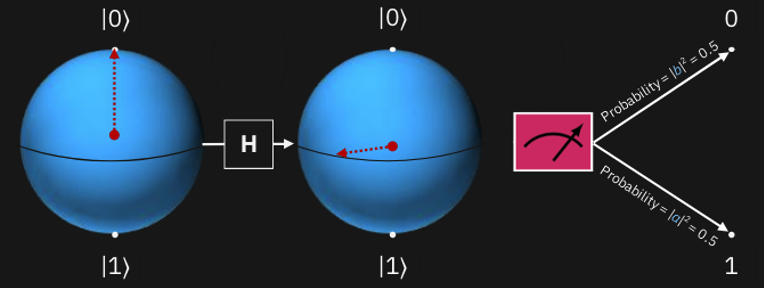

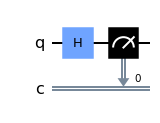

In [193]:
qc = QuantumCircuit(1,1)
qc.h(0)
qc.measure(0,0)
display(qc.draw('mpl'))

## Run the Experiment n-times

{'1': 2, '0': 3}


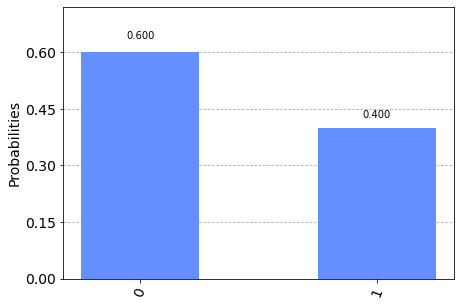

In [195]:
exp = 5
backend = BasicAer.get_backend('qasm_simulator')
job = execute(qc, backend, shots = exp)
results = job.result()
counts = results.get_counts(qc)
print(counts)
display(plot_histogram(counts))

In [196]:
if counts.get('0') is None:
  counts['0'] = 0
if counts.get('1') is None:
  counts['1'] = 0

In [197]:
zero = counts['0']/ exp
one = counts['1']/ exp

## Transform the measured qubit state probabilities into sin-waves

In [198]:
sr = 22050 # sample rate
T = 5.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
wave1 = zero*np.sin(2*np.pi*261.63*t)# pure sine wave playing a C
wave2 = one*np.sin(2*np.pi*392.00*t)# pure sine wave playing a G
wave = wave1 + wave2

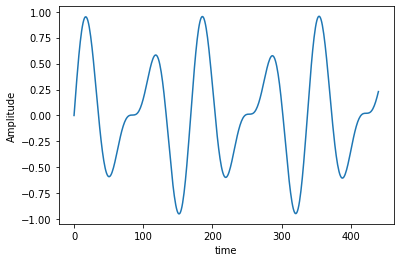

In [200]:
plt.plot(wave[0:int(22050/50)])
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.show()

## Play and Listen to the Sound of the Qubit

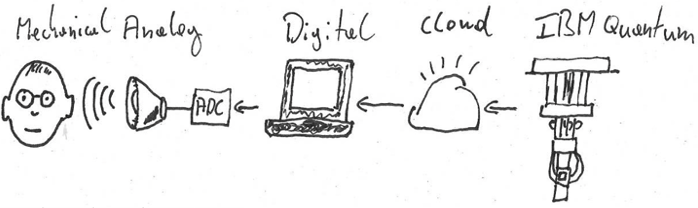

In [44]:
ipd.Audio(wave, rate=sr) # load a NumPy array

## Quantum Circuit With Two Qubits

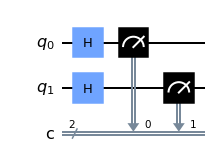

In [45]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.h(1)
qc.measure([0,1],[0,1])
display(qc.draw('mpl'))

{'10': 1, '00': 1, '01': 2, '11': 1}


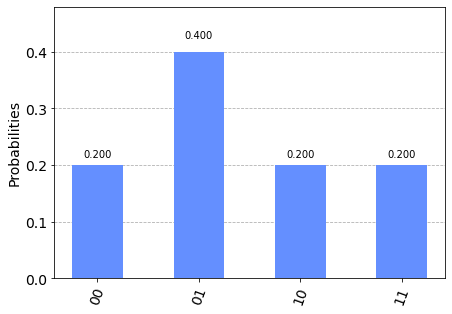

In [221]:
exp = 5
backend = BasicAer.get_backend('qasm_simulator')
job = execute(qc, backend, shots = exp)
results = job.result()
counts = results.get_counts(qc)
print(counts)
display(plot_histogram(counts))

In [229]:
if counts.get('00') is None:
 counts['00'] = 0
if counts.get('01') is None:
 counts['01'] = 0
if counts.get('10') is None:
 counts['10'] = 0
if counts.get('11') is None:
 counts['11'] = 0

In [230]:
zerozero = counts['00']/ exp
zeroone  = counts['01']/ exp
onezero  = counts['10']/exp
oneone   = counts['11']/exp

In [231]:
sr = 22050 # sample rate
T = 1.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
wave1 = zerozero*np.sin(2*np.pi*440*t)# pure sine wave playing a C
wave2 = zeroone*np.sin(2*np.pi*523.251*t)# pure sine wave playing a G
wave3 = onezero*np.sin(2*np.pi*391.995*t)# pure sine wave playing a C
wave4 = oneone*np.sin(2*np.pi*329.628*t)# pure sine wave playing a G

#wave = wave1 + wave2
wave = np.concatenate((wave1, wave2, wave3, wave4), axis = 0)
wave1 = wave1 + wave2 + wave3 + wave4

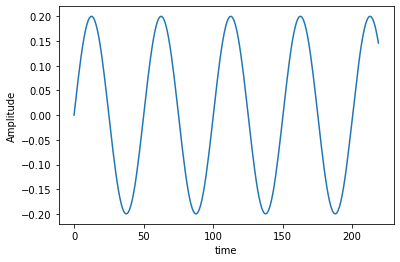

In [232]:
plt.plot(wave[0:int(22050/100)])
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.show()

In [234]:
ipd.Audio(wave1, rate=sr) #ipd.Audio(wave2, rate=sr)# load a NumPy array

In [207]:
sr = 22050 # sample rate
T = 2.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable

{'00': 3, '10': 2}


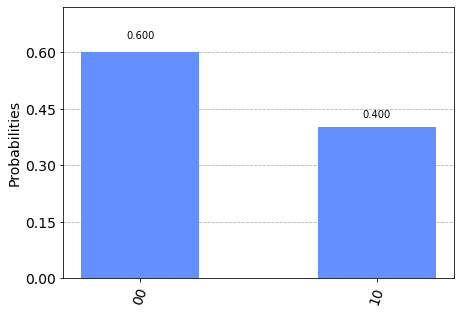

{'01': 4, '00': 1}


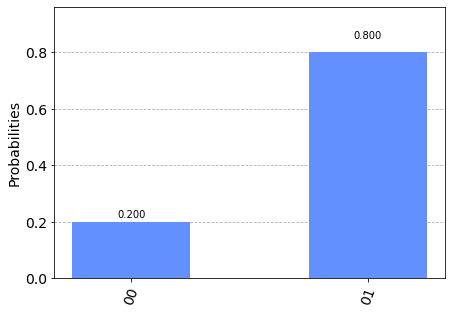

{'00': 3, '10': 2}


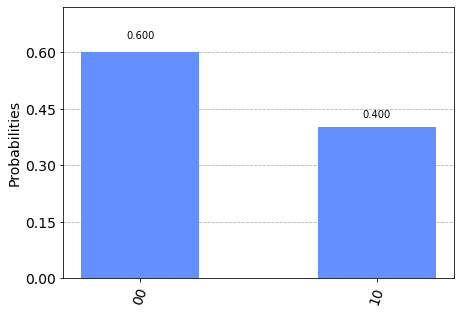

{'00': 1, '11': 2, '10': 1, '01': 1}


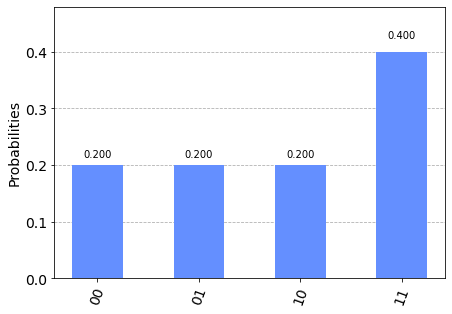

{'01': 2, '10': 2, '11': 1}


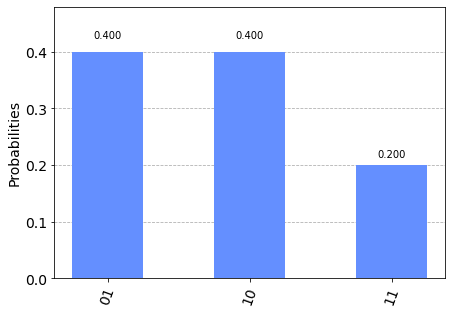

{'01': 3, '00': 1, '10': 1}


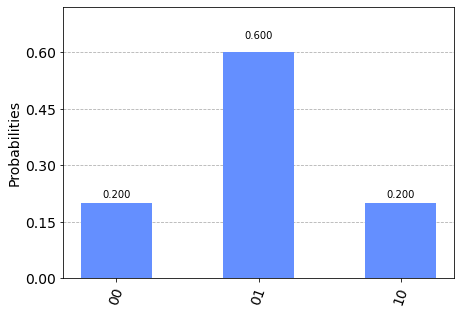

In [216]:
c = 1
for i in range(1,7):

 qc = QuantumCircuit(2,2)
 qc.h(0)
 qc.h(1)
 qc.measure([0,1],[0,1])

 exp = 5
 backend = BasicAer.get_backend('qasm_simulator')
 job = execute(qc, backend, shots = exp)
 results = job.result()
 counts = results.get_counts(qc)
 print(counts)
 display(plot_histogram(counts))

 if counts.get('00') is None:
  counts['00'] = 0
 if counts.get('01') is None:
  counts['01'] = 0
 if counts.get('10') is None:
  counts['10'] = 0
 if counts.get('11') is None:
  counts['11'] = 0

 zerozero = counts['00']/ exp
 zeroone  = counts['01']/ exp
 onezero  = counts['10']/exp
 oneone   = counts['11']/exp
 
 locals()["wave" + str(c)]  = zerozero*np.sin(2*np.pi*440*t)
 locals()["wave" + str(c+1)]= zeroone*np.sin(2*np.pi*523.251*t) 
 locals()["wave" + str(c+2)]= onezero*np.sin(2*np.pi*391.995*t)
 locals()["wave" + str(c+3)]= oneone*np.sin(2*np.pi*329.628*t)
 
 locals()["sound" + str(i)]  = np.concatenate((locals()["wave" + str(c)],locals()["wave" + str(c+1)],locals()["wave" + str(c+2)],locals()["wave" + str(c+3)]), axis=0)
    
 c+=4
i+=1

In [219]:
wave1 = np.concatenate((sound1,sound2,sound3,sound4,sound5,sound6), axis = 0)

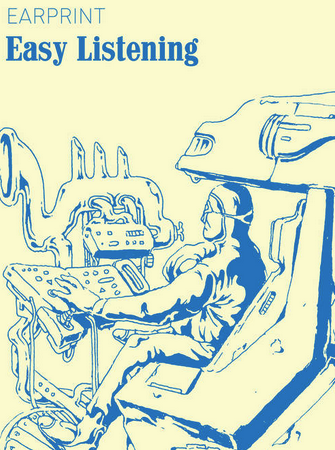

In [218]:
ipd.Audio(wave1, rate=sr) #ipd.Audio(wave2, rate=sr)# load a NumPy array